#Setup (Libraries and data import)

#resource
https://www.kaggle.com/cstein06/tutorial-to-the-g-research-crypto-competition#Preprocessing

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from google.colab import drive
import plotly.express as px
import seaborn as sns
cmap = sns.color_palette()
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.getcwd()
path = '/content/drive/My Drive/Python/Kaggle/g-research-crypto-forecasting'
os.chdir(path)

In [ ]:
os.getcwd()
path = '/content/drive/MyDrive/ML/g-research-crypto-forecasting'
os.chdir(path)

In [ ]:
train = pd.read_csv('train.csv')

#Data Visualization

In [ ]:
train

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.920000,25.874000,25.877000,1.210873e+02,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...,...
24236801,1632182400,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,1632182400,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236803,1632182400,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN
24236804,1632182400,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN


In [ ]:
assets = pd.read_csv('asset_details.csv')
assets.sort_values('Weight', ascending = False)

,Asset_ID,Weight,Asset_Name
2,1,6.779922,Bitcoin
5,6,5.894403,Ethereum
10,3,4.406719,Cardano
1,0,4.304065,Binance Coin
13,4,3.555348,Dogecoin
0,2,2.397895,Bitcoin Cash
6,9,2.397895,Litecoin
4,7,2.079442,Ethereum Classic
9,12,2.079442,Stellar
8,13,1.791759,TRON


##Data Distribution

In [ ]:
train['asset_name'] = train.Asset_ID.map(assets.set_index('Asset_ID').Asset_Name)
print(f'There are {len(train)} rows in the dataset')
train.head()

There are 24236806 rows in the dataset


,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,asset_name
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,Bitcoin Cash
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,Binance Coin
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,Bitcoin
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,EOS.IO
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264,Ethereum Classic


In [ ]:
asset_counts = []
for asset in assets.Asset_ID:
    x = assets[assets.Asset_ID == asset].Asset_Name.values[0]
    y = train[train.Asset_ID == asset].Asset_ID.value_counts().values[0]
    asset_counts.append([x,y])
asset_count_df = pd.DataFrame(asset_counts)
asset_count_df.columns = ['coin', 'count']
asset_count_df

,coin,count
0,Bitcoin Cash,1953537
1,Binance Coin,1942619
2,Bitcoin,1956282
3,EOS.IO,1955140
4,Ethereum Classic,1951127
5,Ethereum,1956200
6,Litecoin,1956030
7,Monero,1701261
8,TRON,1874560
9,Stellar,1778749


In [ ]:
fig_1 = px.pie(asset_count_df, values = 'count', names = 'coin',
              title = 'Distribution of data in the dataset')
fig_1.show()

##Plot Visualization - Closing Prices

In [ ]:
bit = train[train.Asset_ID == 1].set_index('timestamp')
bit.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,asset_name
timestamp,,,,,,,,,,
1514764860,1,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643,Bitcoin
1514764920,1,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037,Bitcoin
1514764980,1,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309,Bitcoin
1514765040,1,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999,Bitcoin
1514765100,1,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079,Bitcoin


In [ ]:
def plot_close(data):
  f = plt.figure(figsize = (10,6))
  ax = f.add_subplot(111)
  ax.set_facecolor('azure')
  plt.plot(data, c = 'darkviolet')
  plt.axvline(x = 1546300800, label = 'Start of 2019', c = 'orange')
  plt.axvline(x = 1577836800, label = 'Start of 2020', c = 'forestgreen')
  plt.axvline(x = 1609459200, label = 'Start of 2021', c = 'crimson')
  plt.legend()
  plt.xlabel('Time')
  plt.ylabel('Close Price')
  plt.grid()
  plt.title('Close price vs Time')

  plt.show()

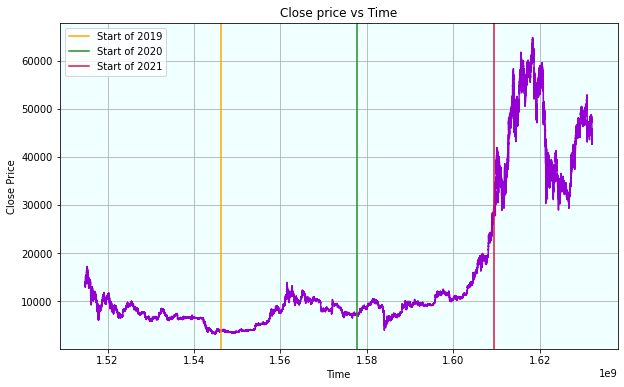

In [ ]:
plot_close(bit_close)


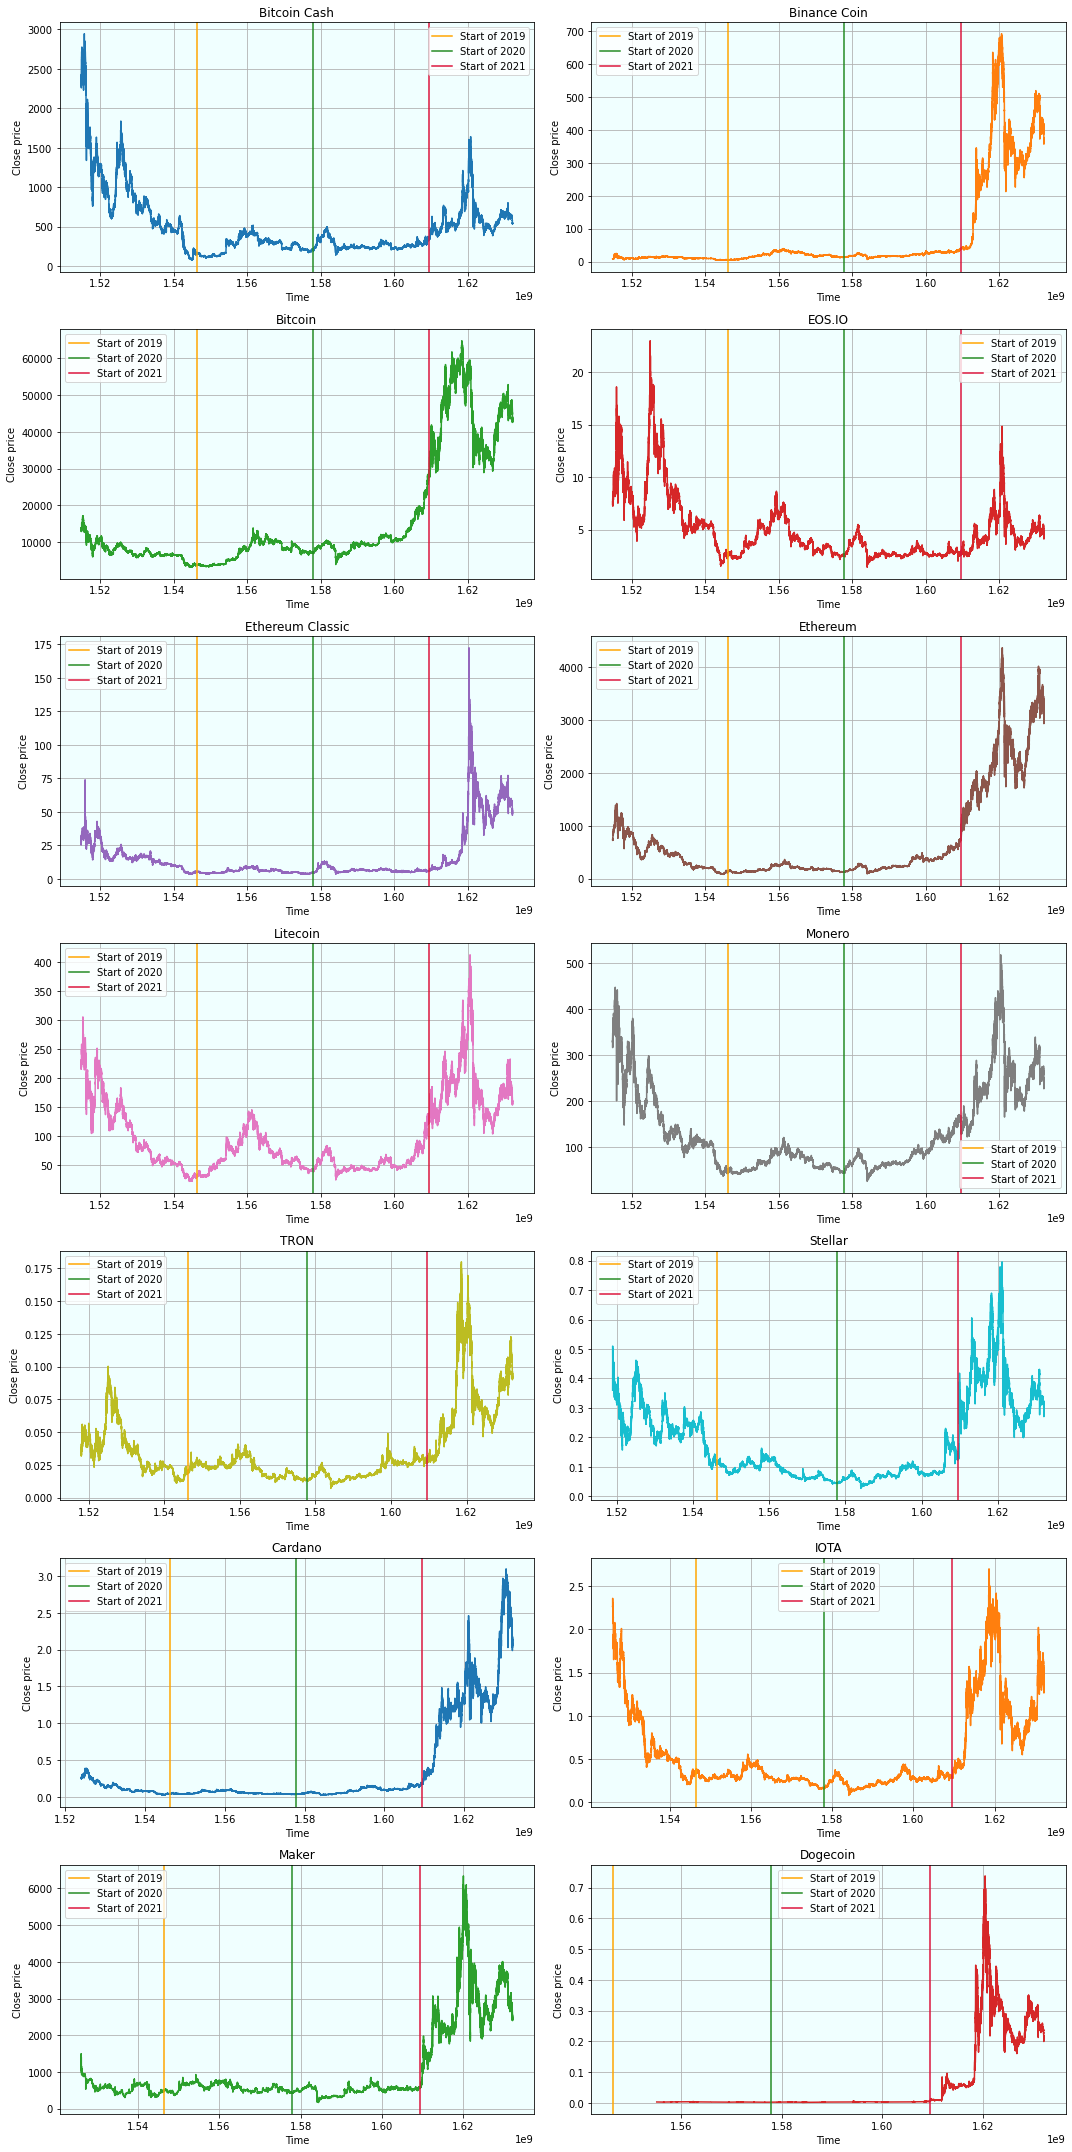

In [ ]:
f = plt.figure(figsize = (15,30))

for ind,coin in enumerate(assets.Asset_Name.values):
    crypto = train[train.asset_name == coin].set_index('timestamp')
    ax = f.add_subplot(7,2,ind+1)
    ax.set_facecolor('azure')
    plt.plot(crypto['Close'], c = cmap[ind%10])
    plt.axvline(x = 1546300800, label = 'Start of 2019', c = 'orange')
    plt.axvline(x = 1577836800, label = 'Start of 2020', c = 'forestgreen')
    plt.axvline(x = 1609459200, label = 'Start of 2021', c = 'crimson')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Close price')
    plt.grid()
    plt.title(coin)
    
plt.tight_layout()
plt.show()

#Data Manipulation

## Normalizing BitCoin Data

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers.core import Dense, Activation, Dropout
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Bidirectional
import keras.layers
import time

In [ ]:
#missing prices
bin = train[train["Asset_ID"]==0].set_index("timestamp") # Asset_ID = 0 for Binance
btc = train[train["Asset_ID"]==1].set_index("timestamp") # Asset_ID = 1 for Bitcoin
btcC = train[train["Asset_ID"]==2].set_index("timestamp") # Asset_ID = 2 for Bitcoin Cash
eos = train[train["Asset_ID"]==5].set_index("timestamp") # Asset_ID = 5 for Eos
eth = train[train["Asset_ID"]==6].set_index("timestamp") # Asset_ID = 6 for Etherium
ethC = train[train["Asset_ID"]==7].set_index("timestamp") # Asset_ID = 7 for Etherium Classic
lite = train[train["Asset_ID"]==9].set_index("timestamp") # Asset_ID = 9 for Litecoin
mon = train[train["Asset_ID"]==11].set_index("timestamp") # Asset_ID = 11 for Monero
ste = train[train["Asset_ID"]==12].set_index("timestamp") # Asset_ID = 12 for Stellar
tron = train[train["Asset_ID"]==13].set_index("timestamp") # Asset_ID = 13 for Tron

bin = bin.reindex(range(bin.index[0],bin.index[-1]+60,60),method = 'pad')
btc = btc.reindex(range(btc.index[0],btc.index[-1]+60,60),method = 'pad')
btcC = btcC.reindex(range(btcC.index[0],btcC.index[-1]+60,60),method = 'pad')
eos = eos.reindex(range(eos.index[0],eos.index[-1]+60,60),method = 'pad')
eth = eth.reindex(range(eth.index[0],eth.index[-1]+60,60),method = 'pad')
ethC = ethC.reindex(range(ethC.index[0],ethC.index[-1]+60,60),method = 'pad')
lite = lite.reindex(range(lite.index[0],lite.index[-1]+60,60),method = 'pad')
mon = mon.reindex(range(mon.index[0],mon.index[-1]+60,60),method = 'pad')
ste = ste.reindex(range(ste.index[0],ste.index[-1]+60,60),method = 'pad')
tron = tron.reindex(range(tron.index[0],tron.index[-1]+60,60),method = 'pad')

In [ ]:
bit_close = btc['Close']

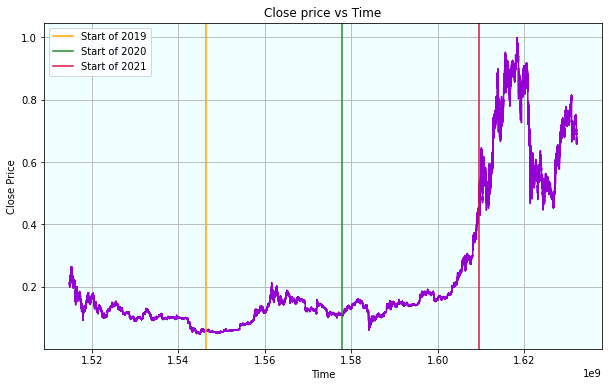

In [ ]:
scaled_bit_close = bit_close/(max(bit_close))
plot_close(scaled_bit_close)
scaled_bit_close = np.array(scaled_bit_close, dtype='float')

In [ ]:
scaled_bit_close = scaled_bit_close.reshape(int(len(scaled_bit_close)/60), 60, 1)

In [ ]:
scaled_bit_close.shape

(32616, 60, 1)

##Split into test and train

In [ ]:

train_data = scaled_bit_close

#print(train_data.shape)

x_train = np.zeros((train_data.shape[0], 59, 1))
y_train = np.zeros(((train_data.shape[0]), 1, 1) )

for i in range(len(train_data)):
  x_train[i] = train_data[i][:59]
  y_train[i] = train_data[i][59:]

#Convert both train sets to numpy arrays
#x_train, y_train = np.array(x_train), np.array(y_train)

print(x_train.shape, y_train.shape)

(32616, 59, 1) (32616, 1, 1)


In [ ]:
tf.keras.backend.clear_session()

model = Sequential()
model.add(LSTM(590, batch_input_shape=(None, 59, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(units=(50)))
model.add(LSTM((59), return_sequences=True))
model.add(Dense(units=(5)))
model.add(Dropout(0.2))
model.add(LSTM((1), return_sequences=False))
model.add(Dropout(0.2))
#model.add(Dense(units=3))
#model.compile(loss='kullback_leibler_divergence', optimizer='adam', metrics='accuracy')
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
#model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics='accuracy')
#model.add(Activation('sigmoid'))
#model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 59, 590)           1397120   
                                                                 
 dropout (Dropout)           (None, 59, 590)           0         
                                                                 
 dense (Dense)               (None, 59, 50)            29550     
                                                                 
 lstm_1 (LSTM)               (None, 59, 59)            25960     
                                                                 
 dense_1 (Dense)             (None, 59, 5)             300       
                                                                 
 dropout_1 (Dropout)         (None, 59, 5)             0         
                                                                 
 lstm_2 (LSTM)               (None, 1)                 2

In [ ]:
# Fits the x_train and y_train data into the model
history = model.fit(x_train, y_train, batch_size = None, epochs= 1)

1020/1020 [==============================] - 791s 770ms/step - loss: 0.0228 - mean_squared_error: 0.0228


In [ ]:
pred = model.predict(x_train)

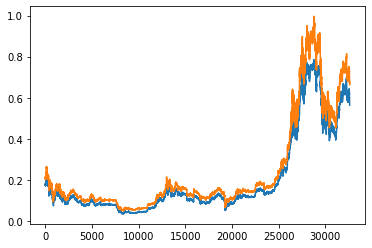

In [ ]:
plt.plot(pred)
plt.plot(y_train.reshape(32616))
plt.show()

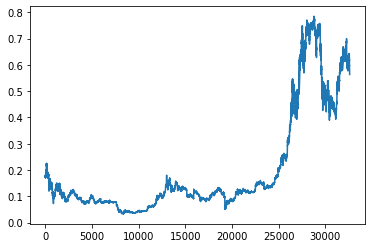

In [ ]:
plt.plot(pred)

In [ ]:
test = pd.read_csv('example_test.csv')

In [ ]:
btc_test = test[test['Asset_ID']==3]
btc_test

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,group_num,row_id
0,1623542400,3,1201.0,1.478556,1.486030,1.478000,1.483681,654799.561103,1.481439,0,0
14,1623542460,3,672.0,1.482410,1.483759,1.479200,1.482043,285828.559844,1.481495,1,14
28,1623542520,3,849.0,1.481492,1.482896,1.477801,1.479259,486854.589883,1.480640,2,28
42,1623542580,3,1023.0,1.479075,1.479399,1.472600,1.473527,328684.942928,1.476372,3,42


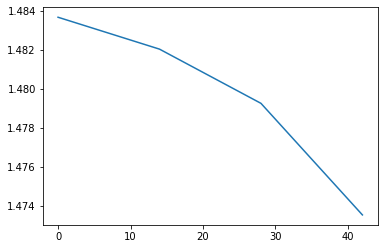

In [ ]:
plt.plot(btc_test['Close'])